In [1]:
from keras.models import load_model


Using TensorFlow backend.


In [4]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import cv2
from PIL import Image as PIL_Image
from PIL import ImageEnhance
from PIL import ImageOps

In [14]:
import datetime

In [3]:
model = load_model('../CNN_1_9_1CNN.hdf5')

In [5]:
def general(img):
    #Image enhancement                  
    contr = ImageEnhance.Contrast(img)  
    img = contr.enhance(5)                                                    # The enhancement values (contrast and brightness)   
    bright = ImageEnhance.Brightness(img)                                     # depends on backgroud, external lights etc  
    img = bright.enhance(2.0)
    img = ImageOps.expand(img,border=80,fill='white')   
    threshold = 120    
    img = img.point(lambda p: p > threshold and 255)  
    
    #Find bounding box  
    inverted = ImageOps.invert(img)  
    box = inverted.getbbox()  
    img_new = img.crop(box)  
    width, height = img_new.size  
    ratio = min((28./height), (28./width))  
    background = PIL_Image.new('RGB', (28,28), (255,255,255)) 
    
    if(height == width):  
        img_new = img_new.resize((28,28))  
    elif(height>width):  
        img_new = img_new.resize((int(width*ratio),28))  
        background.paste(img_new, (int((28-img_new.size[0])/2),int((28-img_new.size[1])/2)))  
    else:  
        img_new = img_new.resize((28, int(height*ratio)))  
        background.paste(img_new, (int((28-img_new.size[0])/2),int((28-img_new.size[1])/2)))  
        
    # background = background.convert("L")
    img_data=np.asarray(background)
    img_data = img_data[:,:,0]  
    img_data = 255 -img_data
    
    return img_data

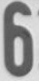

In [17]:
orig_img_path = './c61.png'
img = PIL_Image.open(orig_img_path).convert("L")
img

(28, 28)


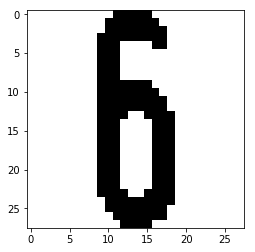

(1, 28, 28, 1)


In [18]:
img_1 = general(img)
img_1 = 255 -img_1

print(img_1.shape)
plt.imshow(img_1, cmap='gray')
plt.show()
img_1=img_1.reshape(1,28,28,1)
print(img_1.shape)

In [19]:
a = datetime.datetime.now()
predict = model.predict(img_1)
b = datetime.datetime.now()
c = b -a
print(str(c.total_seconds()))

0.003478


In [20]:
print(np.argmax(predict))
print(predict)

6
[[8.1788057e-05 2.7376764e-05 1.5893633e-06 1.6395157e-05 6.1521394e-05
  2.8133759e-04 9.9945229e-01 8.6021091e-06 6.2560524e-05 6.5903350e-06]]
